In [1]:
import pandas as pd

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
df_train = pd.read_csv('./USdata.csv')

train_data = df_train.drop(
    ['Id', 'County', 'Country_Region'], axis=1)
#test_data = df_test.drop(
#    ['County', 'Province_State', 'Country_Region'], axis=1)
train_data.set_index('Date', inplace=True)
#test_data.set_index('Date', inplace=True)

train_confirm = train_data[train_data['Target'] == 'ConfirmedCases']
train_confirm = train_confirm.drop(['Target'], axis = 1)
train_confirm['TargetValue'] = np.where(train_confirm['TargetValue'] <=0, 0, train_confirm['TargetValue'])
print(train_confirm)

X = train_confirm.iloc[:, 0: 4].to_numpy()
print(X)
# # MinMaxScaling线性函数归一化

# sc_pop = MinMaxScaler(feature_range=(0, 1))
# sc_tg = MinMaxScaler(feature_range=(0, 1))
# X[:, 0:1] = sc_pop.fit_transform(X[:, 0:1])
# X[:, 2:3] = sc_tg.fit_transform(X[:, 2:3])

# X = X.reshape(-1,140,3)
# print(X.shape)

          Province_State  Population    Weight  TargetValue
Date                                                       
2020/1/23        Alabama     4887871  0.064926            0
2020/1/24        Alabama     4887871  0.064926            0
2020/1/25        Alabama     4887871  0.064926            0
2020/1/26        Alabama     4887871  0.064926            0
2020/1/27        Alabama     4887871  0.064926            0
...                  ...         ...       ...          ...
2020/6/6         Wyoming      577737  0.075376            6
2020/6/7         Wyoming      577737  0.075376            8
2020/6/8         Wyoming      577737  0.075376           13
2020/6/9         Wyoming      577737  0.075376           10
2020/6/10        Wyoming      577737  0.075376           10

[7560 rows x 4 columns]
[['Alabama' 4887871 0.064925505 0]
 ['Alabama' 4887871 0.064925505 0]
 ['Alabama' 4887871 0.064925505 0]
 ...
 ['Wyoming' 577737 0.075375696 13]
 ['Wyoming' 577737 0.075375696 10]
 ['Wyoming' 577

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var4(t)
1        0.0   0.121015   0.270701        0.0      0.0
2        0.0   0.121015   0.270701        0.0      0.0
3        0.0   0.121015   0.270701        0.0      0.0
4        0.0   0.121015   0.270701        0.0      0.0
5        0.0   0.121015   0.270701        0.0      0.0
(7559, 5)
train_x.shape, train_y.shape, test_x.shape, test_y.shape
(7000, 1, 4) (7000,) (559, 1, 4) (559,)
Epoch 1/7
98/98 - 2s - loss: 0.0246 - val_loss: 0.0082 - 2s/epoch - 22ms/step
Epoch 2/7
98/98 - 0s - loss: 0.0214 - val_loss: 0.0098 - 158ms/epoch - 2ms/step
Epoch 3/7
98/98 - 0s - loss: 0.0198 - val_loss: 0.0097 - 159ms/epoch - 2ms/step
Epoch 4/7
98/98 - 0s - loss: 0.0169 - val_loss: 0.0067 - 159ms/epoch - 2ms/step
Epoch 5/7
98/98 - 0s - loss: 0.0143 - val_loss: 0.0126 - 151ms/epoch - 2ms/step
Epoch 6/7
98/98 - 0s - loss: 0.0127 - val_loss: 0.0100 - 149ms/epoch - 2ms/step
Epoch 7/7
98/98 - 0s - loss: 0.0111 - val_loss: 0.0040 - 143ms/epoch - 1ms/step


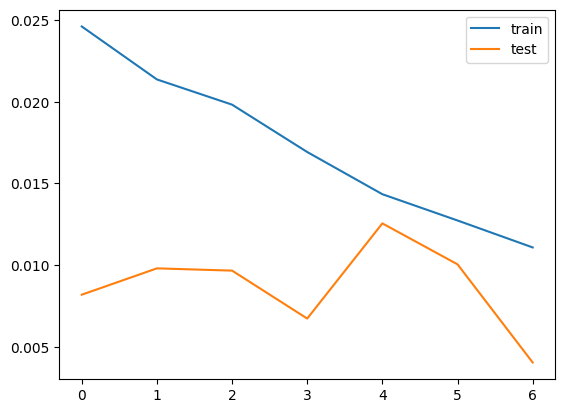

(559, 1, 4)
18/18 [==============================] - 0s 1ms/step
[0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873407 0.15873407 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376
 0.15873376 0.15873376 0.15873376 0.15873376 0.15873376 1.1402767
 0.5222582  0.43775883 0.62148786 0.17341112 0.41939333 1.1181811
 0.79062974 0.15873376 1.4903675  0.7023686  1.1476426  0.9083553
 0.9819597  0.55165607 1.1255453  2.4285264  1.1513255  2.1955497
 1.7596817  1.8445867  2.0329452  0.8053422  3.0395732  1.8408954
 1.6342155  2.287978   1.9479834  1.5604377  2.3101654  1.4940549
 1.9258242  1.3171092  0.8016642  0.2541562  0.7612055  0.683984
 0.58

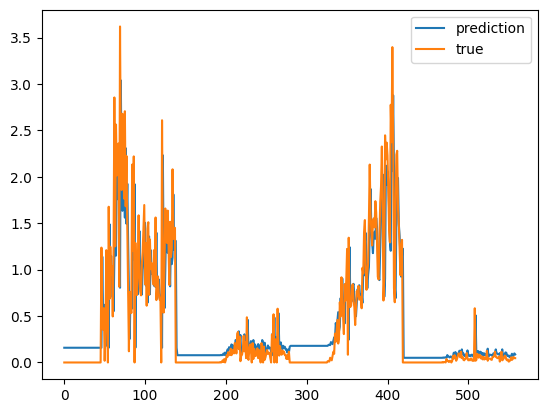

Test RMSE: 0.383


In [2]:
#转成有监督数据
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    #数据序列(也将就是input) input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        #预测数据（input对应的输出值） forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    #拼接 put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # 删除值为NAN的行 drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


##数据预处理 load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
values = X
#标签编码 integer encode direction
encoder = LabelEncoder()
values[:, 0] = encoder.fit_transform(values[:, 0])

#保证为float ensure all data is float
values = values.astype('float32')

#归一化 normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#转成有监督数据 frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

#删除不预测的列 drop columns we don't want to predict
reframed.drop(reframed.columns[[4, 5, 6]], axis=1, inplace=True)
print(reframed.head())

#数据准备
#把数据分为训练数据和测试数据 split into train and test sets
values = reframed.values
print(values.shape)
#训练年份
n_train_hours = 50*140
#划分训练数据和测试数据
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
#拆分输入输出 split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape输入为LSTM的输入格式 reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print ('train_x.shape, train_y.shape, test_x.shape, test_y.shape')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


##模型定义 design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
#模型训练 fit network
history = model.fit(train_X, train_y, epochs=7, batch_size=72, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)
#输出 plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#进行预测 make a prediction
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#预测数据逆缩放 invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
inv_yhat = np.array(inv_yhat)
print(inv_yhat)

#真实数据逆缩放 invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
print(inv_y)

#画出真实数据和预测数据
pyplot.plot(inv_yhat,label='prediction')
pyplot.plot(inv_y,label='true')
pyplot.legend()
pyplot.show()

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [3]:
print(inv_y.shape)

(559,)


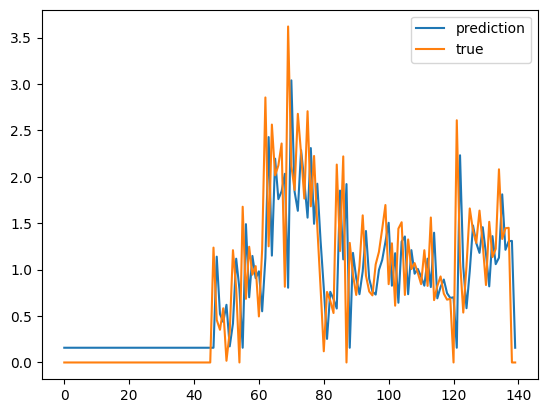

<Figure size 640x480 with 0 Axes>

In [8]:
#画出真实数据和预测数据
pyplot.plot(inv_yhat[0:140],label='prediction')
pyplot.plot(inv_y[0:140],label='true')
pyplot.legend()
pyplot.show()
pyplot.savefig("1.png")

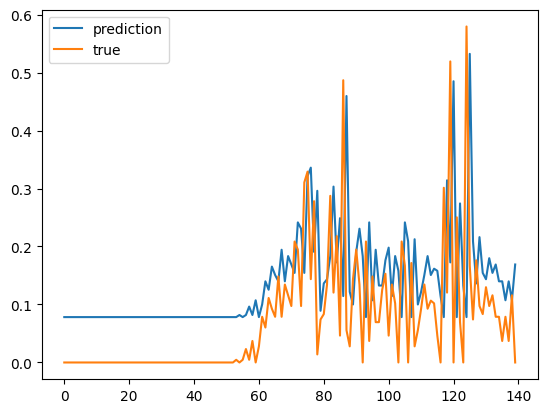

<Figure size 640x480 with 0 Axes>

In [9]:
#画出真实数据和预测数据
pyplot.plot(inv_yhat[140:140*2],label='prediction')
pyplot.plot(inv_y[140:140*2],label='true')
pyplot.legend()
pyplot.show()
pyplot.savefig("2.png")

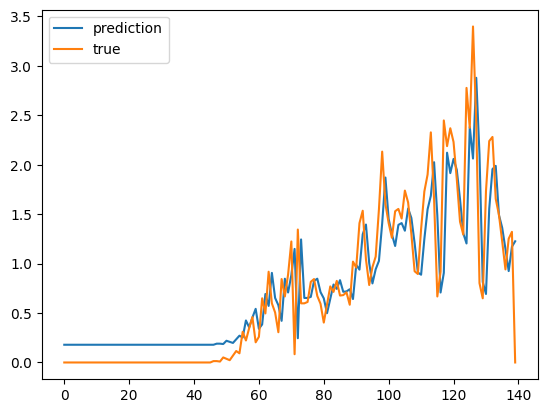

<Figure size 640x480 with 0 Axes>

In [10]:
#画出真实数据和预测数据
pyplot.plot(inv_yhat[140*2:140*3],label='prediction')
pyplot.plot(inv_y[140*2:140*3],label='true')
pyplot.legend()
pyplot.show()
pyplot.savefig("3.png")

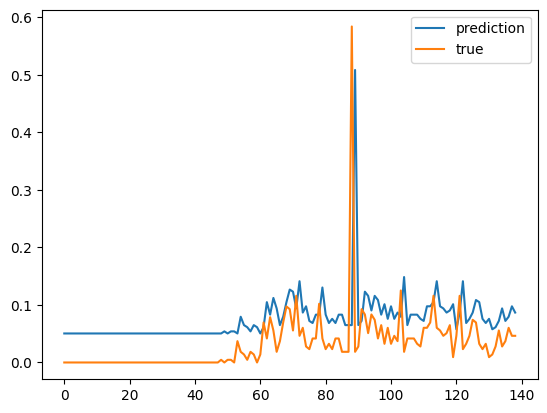

<Figure size 640x480 with 0 Axes>

In [11]:
#画出真实数据和预测数据
pyplot.plot(inv_yhat[140*3:140*4],label='prediction')
pyplot.plot(inv_y[140*3:140*4],label='true')
pyplot.legend()
pyplot.show()
pyplot.savefig("4.png")